# Objective

* Identify the Which Platform have more impact on Price 

* To build the Model which will help to Predict the future Price based on Money invest in Different Platform 

In [2]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [3]:
new = pd.read_excel(r"C:\Users\cheta\Desktop\python\Machine learning with python\Linear Regression\Cellphone.xlsx") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,Product_id,Price,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


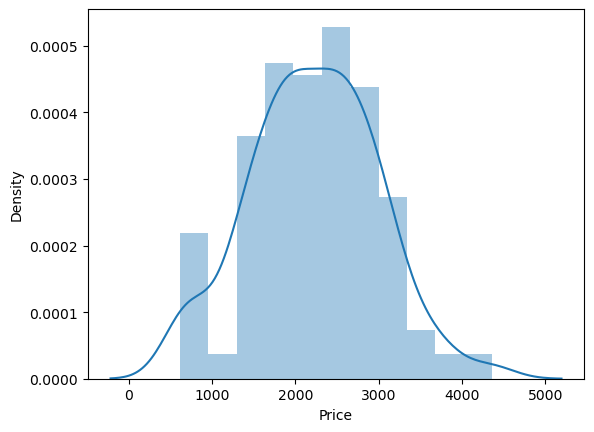

In [4]:
ax = sns.distplot(new.Price)

# Data Type 

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   Weight        161 non-null    float64
 4   Resoloution   161 non-null    float64
 5   Ppi           161 non-null    int64  
 6   Cpu_core      161 non-null    int64  
 7   Cpu_freq      161 non-null    float64
 8   Internal_mem  161 non-null    float64
 9   Ram           161 non-null    float64
 10  Rear_Cam      161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  Battery       161 non-null    int64  
 13  Thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


# Univariate Analysis

In [6]:
new.describe() 

,Product_id,Price,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

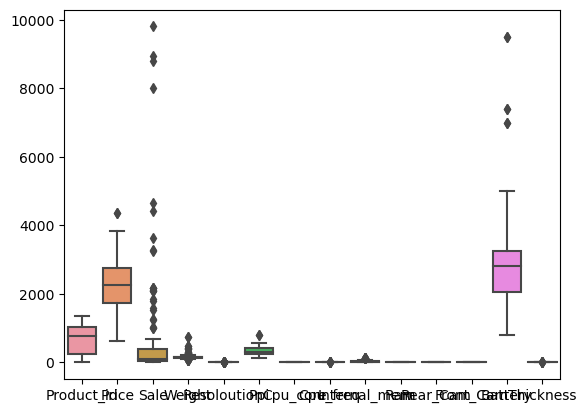

In [7]:
sns.boxplot(data=new)

In [8]:
for i in new:
    q1 = new[i].quantile(0.25)
    q3 = new[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    lower_limit = q1-1.5*iqr
    new[i]=np.where(new[i]>upper_limit,upper_limit,new[i])
    new[i]=np.where(new[i]<lower_limit,lower_limit,new[i])
    if type(i)==str:
        continue

### Treatment of Outlier -- Winsorizing Technique

<AxesSubplot:>

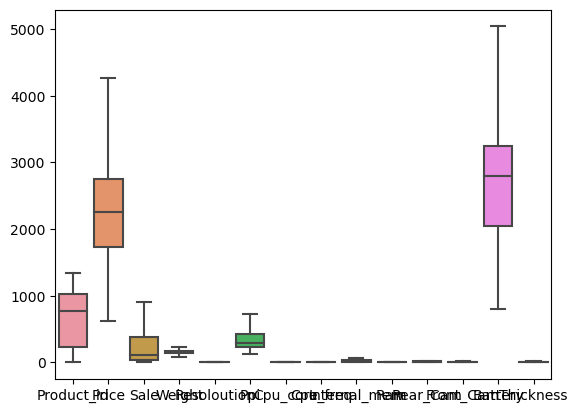

In [9]:
sns.boxplot(data=new)

### Missing Value

In [10]:
new.isna().sum()

Product_id      0
Price           0
Sale            0
Weight          0
Resoloution     0
Ppi             0
Cpu_core        0
Cpu_freq        0
Internal_mem    0
Ram             0
Rear_Cam        0
Front_Cam       0
Battery         0
Thickness       0
dtype: int64

In [11]:
new.Price=np.sqrt(new.Price)
new

,Product_id,Price,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
0,203.0,48.548944,10.0,135.0,5.20,424.0,8.0,1.350,16.0,3.000,13.00,8.0,2610.0,7.4
1,880.0,41.821047,10.0,125.0,4.00,233.0,2.0,1.300,4.0,1.000,3.15,0.0,1700.0,9.9
2,40.0,43.772137,10.0,110.0,4.70,312.0,4.0,1.200,8.0,1.500,13.00,5.0,2000.0,7.6
3,99.0,36.262929,11.0,118.5,4.00,233.0,2.0,1.300,4.0,0.512,3.15,0.0,1400.0,11.0
4,880.0,41.821047,11.0,125.0,4.00,233.0,2.0,1.300,4.0,1.000,3.15,0.0,1700.0,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206.0,59.590268,899.5,178.0,5.46,538.0,4.0,1.875,68.0,6.000,12.00,16.0,4080.0,8.4
157,1296.0,56.665686,899.5,170.0,5.50,534.0,4.0,1.975,68.0,6.000,20.00,8.0,3400.0,7.9
158,856.0,57.096410,899.5,150.0,5.50,401.0,8.0,2.200,64.0,4.000,20.00,20.0,3000.0,6.8
159,1296.0,56.665686,899.5,170.0,5.50,534.0,4.0,1.975,68.0,6.000,20.00,8.0,3400.0,7.9


# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [12]:
new.head()

,Product_id,Price,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
0,203.0,48.548944,10.0,135.0,5.2,424.0,8.0,1.35,16.0,3.000,13.00,8.0,2610.0,7.4
1,880.0,41.821047,10.0,125.0,4.0,233.0,2.0,1.30,4.0,1.000,3.15,0.0,1700.0,9.9
2,40.0,43.772137,10.0,110.0,4.7,312.0,4.0,1.20,8.0,1.500,13.00,5.0,2000.0,7.6
3,99.0,36.262929,11.0,118.5,4.0,233.0,2.0,1.30,4.0,0.512,3.15,0.0,1400.0,11.0
4,880.0,41.821047,11.0,125.0,4.0,233.0,2.0,1.30,4.0,1.000,3.15,0.0,1700.0,9.9


In [13]:
X = new.drop(['Weight','Resoloution','Cpu_freq','Thickness','Ppi','Product_id'], axis= 1)

X

,Price,Sale,Cpu_core,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery
0,48.548944,10.0,8.0,16.0,3.000,13.00,8.0,2610.0
1,41.821047,10.0,2.0,4.0,1.000,3.15,0.0,1700.0
2,43.772137,10.0,4.0,8.0,1.500,13.00,5.0,2000.0
3,36.262929,11.0,2.0,4.0,0.512,3.15,0.0,1400.0
4,41.821047,11.0,2.0,4.0,1.000,3.15,0.0,1700.0
...,...,...,...,...,...,...,...,...
156,59.590268,899.5,4.0,68.0,6.000,12.00,16.0,4080.0
157,56.665686,899.5,4.0,68.0,6.000,20.00,8.0,3400.0
158,57.096410,899.5,8.0,64.0,4.000,20.00,20.0,3000.0
159,56.665686,899.5,4.0,68.0,6.000,20.00,8.0,3400.0


In [14]:
# Putting feature variable to X1
X1 = new.drop('Price', axis= 1)

# Putting response variable to y
y = new[['Price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test =train_test_split(X1, y, train_size=0.7 ,random_state=120)

In [15]:
df = pd.concat([y_train, X1_train], axis=1)
df.head()

,Price,Product_id,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
114,53.665631,409.0,309.0,145.00,5.10,432.0,8.0,2.100,32.0,4.0,20.0,8.0,3200.0,7.0
85,37.363083,66.0,114.0,223.85,6.55,170.0,4.0,1.200,4.0,1.0,3.0,0.0,3240.0,9.0
156,59.590268,1206.0,899.5,178.00,5.46,538.0,4.0,1.875,68.0,6.0,12.0,16.0,4080.0,8.4
76,50.705029,937.0,100.0,97.00,4.80,306.0,4.0,1.200,16.0,2.0,8.0,5.0,2000.0,5.1
26,44.788391,605.0,24.0,161.00,5.50,200.0,8.0,1.400,4.0,1.0,5.0,0.0,2500.0,8.9


# Correlation Matrix

<AxesSubplot:title={'center':'Price vs Sale'}, xlabel='Sale', ylabel='Price'>

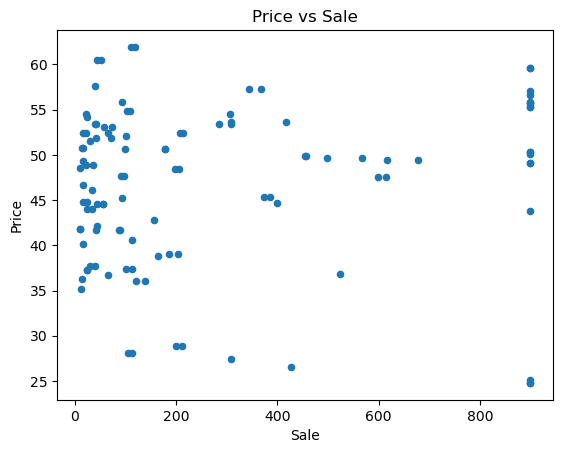

In [16]:
df.plot.scatter(x='Sale', y='Price', title='Price vs Sale')

In [17]:
df.corr()

,Price,Product_id,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
Price,1.000000,0.180768,0.097209,0.494817,0.601959,0.818868,0.691796,0.771970,0.800882,0.870734,0.769990,0.658470,0.723505,-0.810597
Product_id,0.180768,1.000000,0.134533,-0.007712,-0.041890,0.231127,-0.005742,0.136075,0.308032,0.268437,0.156021,0.089064,-0.025624,-0.004058
Sale,0.097209,0.134533,1.000000,0.061631,0.051664,0.169095,-0.010452,0.021982,0.243140,0.216825,0.152017,0.308715,0.091577,0.024155
Weight,0.494817,-0.007712,0.061631,1.000000,0.899442,0.293976,0.422483,0.499852,0.322791,0.407190,0.345439,0.258778,0.808501,-0.435235
Resoloution,0.601959,-0.041890,0.051664,0.899442,1.000000,0.372814,0.589771,0.539689,0.399709,0.472704,0.481777,0.391970,0.806016,-0.632666
Ppi,0.818868,0.231127,0.169095,0.293976,0.372814,1.000000,0.453348,0.738797,0.687097,0.744137,0.771148,0.455549,0.485420,-0.539284
Cpu_core,0.691796,-0.005742,-0.010452,0.422483,0.589771,0.453348,1.000000,0.448693,0.360863,0.461362,0.636726,0.593120,0.553224,-0.709741
Cpu_freq,0.771970,0.136075,0.021982,0.499852,0.539689,0.738797,0.448693,1.000000,0.569690,0.650785,0.614766,0.322954,0.596789,-0.607447
Internal_mem,0.800882,0.308032,0.243140,0.322791,0.399709,0.687097,0.360863,0.569690,1.000000,0.928466,0.540861,0.618665,0.587321,-0.519328
Ram,0.870734,0.268437,0.216825,0.407190,0.472704,0.744137,0.461362,0.650785,0.928466,1.000000,0.646134,0.633619,0.661464,-0.591782


<AxesSubplot:>

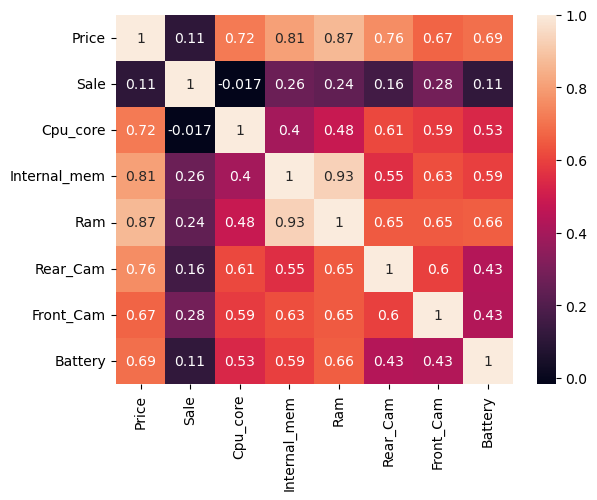

In [18]:
sns.heatmap(X.corr(),annot = True)

#### Internal memory have 84%  strong positve correlation with price

* Internal memory have high impact on price
* There is no colinearity in data, So every platform is independent 

### Multicolinearity (with the help of VIF)

In [19]:
X1=df.drop(['Price','Weight','Resoloution','Ppi','Ram','Cpu_core','Cpu_freq','Battery'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Product_id      4.803249
Sale            2.074609
Internal_mem    4.591299
Rear_Cam        5.560344
Front_Cam       4.178890
Thickness       4.594863
dtype: float64

no collinearity in the data, indicate no multi colinearity 

# Model Building

*  H0 :- There is no Linear relationship between Price and Sale, Internal_memory, Rear_cam , Front_cam  & Thickness

                         Vs 

*  H1 :- There is Linear relationship between Price and Sale, Internal_memory, Rear_cam , Front_cam  & Thickness

Alpha = 0.05 (5%)

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('Price ~ Sale + Internal_mem + Rear_Cam + Front_Cam + Thickness',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           8.08e-53
Time:                        16:20:14   Log-Likelihood:                -269.01
No. Observations:                 112   AIC:                             550.0
Df Residuals:                     106   BIC:                             566.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       55.6059      2.198     25.303      0.000      51.249      59.963
Sale            -0.0014      0.001     -1.595      0.114      -0.003       0.000
Internal_mem     0.1869      0.018     10.592      0.000       0.152       0.222
Rear_Cam         0.3976      0.055      7.250      0.000       0.289       0.506
Front_Cam        0.0560      0.079      0.711      0.479      -0.100       0.212
Thickness       -1.9657      0.203     -9.662      0.000      -2.369      -1.562
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.817
Skew:                           0.246   Prob(JB):                        0.403
Kurtosis:                       2.616   Cond. No.                     3.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# removing the insignificant variable 
model2 = smf.ols('Price ~ Internal_mem + Rear_Cam + Thickness',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     339.1
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           8.69e-55
Time:                        16:20:14   Log-Likelihood:                -270.38
No. Observations:                 112   AIC:                             548.8
Df Residuals:                     108   BIC:                             559.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       56.3992      2.121     26.590      0.000      52.195      60.604
Internal_mem     0.1852      0.016     11.510      0.000       0.153       0.217
Rear_Cam         0.3970      0.053      7.449      0.000       0.291       0.503
Thickness       -2.0645      0.192    -10.726      0.000      -2.446      -1.683
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.471
Skew:                           0.237   Prob(JB):                        0.479
Kurtosis:                       2.701   Cond. No.                         270.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [22]:
df.head()

,Price,Product_id,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
114,53.665631,409.0,309.0,145.00,5.10,432.0,8.0,2.100,32.0,4.0,20.0,8.0,3200.0,7.0
85,37.363083,66.0,114.0,223.85,6.55,170.0,4.0,1.200,4.0,1.0,3.0,0.0,3240.0,9.0
156,59.590268,1206.0,899.5,178.00,5.46,538.0,4.0,1.875,68.0,6.0,12.0,16.0,4080.0,8.4
76,50.705029,937.0,100.0,97.00,4.80,306.0,4.0,1.200,16.0,2.0,8.0,5.0,2000.0,5.1
26,44.788391,605.0,24.0,161.00,5.50,200.0,8.0,1.400,4.0,1.0,5.0,0.0,2500.0,8.9


In [23]:
# Y = intercet + b1 * Tv + b2 * radio
Y = 2795.6907 + 19.4282 * 32  + 32.9322 * 20 + (-151.5273 * 7)
Y

3015.3460000000005

In [24]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,Price,Product_id,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness,fitted_value,residual
114,53.665631,409.0,309.0,145.00,5.10,432.0,8.0,2.100,32.0,4.0,20.0,8.0,3200.0,7.0,55.814485,-2.148854
85,37.363083,66.0,114.0,223.85,6.55,170.0,4.0,1.200,4.0,1.0,3.0,0.0,3240.0,9.0,39.750784,-2.387701
156,59.590268,1206.0,899.5,178.00,5.46,538.0,4.0,1.875,68.0,6.0,12.0,16.0,4080.0,8.4,56.416420,3.173848
76,50.705029,937.0,100.0,97.00,4.80,306.0,4.0,1.200,16.0,2.0,8.0,5.0,2000.0,5.1,52.009732,-1.304703
26,44.788391,605.0,24.0,161.00,5.50,200.0,8.0,1.400,4.0,1.0,5.0,0.0,2500.0,8.9,40.751180,4.037212


# Linearity

<AxesSubplot:title={'center':'Price vs Sale'}, xlabel='Sale', ylabel='Price'>

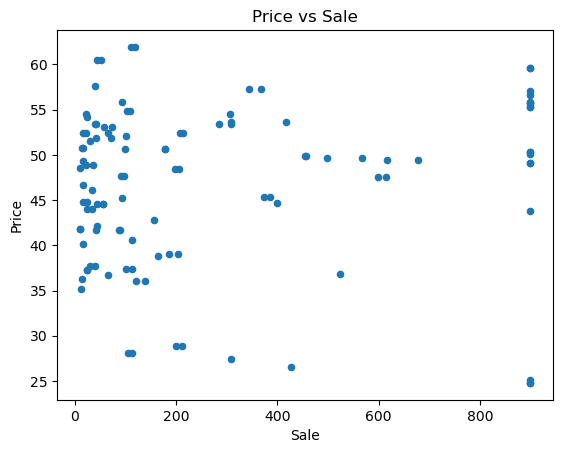

In [25]:
df.plot.scatter(x='Sale', y='Price', title='Price vs Sale')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

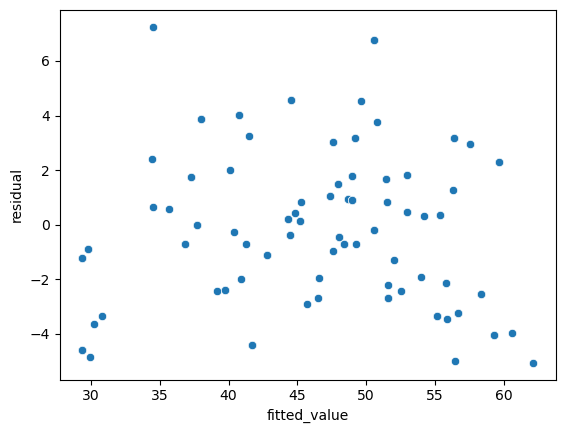

In [26]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

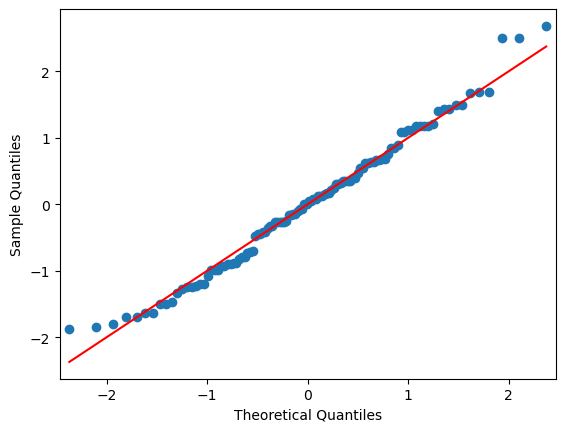

In [27]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

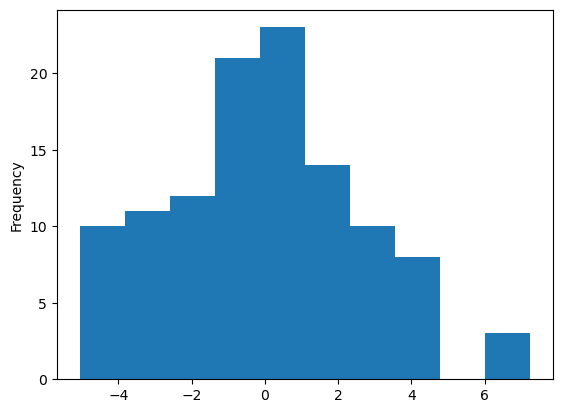

In [28]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [29]:
df_test=pd.concat([X1_test,y_test],axis=1)

df_test.head()

,Product_id,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness,Price
18,1120.0,19.0,141.00,5.0,294.0,4.0,1.20,8.0,1.500,8.0,1.2,2040.0,10.0,40.149720
152,290.0,899.5,223.85,5.7,515.0,8.0,1.95,68.0,6.000,12.0,8.0,5040.0,7.4,65.261014
30,187.0,26.0,150.00,5.0,441.0,4.0,2.30,16.0,2.000,13.0,2.0,2300.0,10.0,47.518417
69,218.0,87.0,97.00,4.8,306.0,8.0,1.70,16.0,1.000,8.0,5.0,2100.0,5.1,48.197510
119,460.0,378.0,118.00,4.0,245.0,4.0,1.20,4.0,0.512,5.0,2.0,1730.0,10.9,41.641326


In [30]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Product_id,Sale,Weight,Resoloution,Ppi,Cpu_core,Cpu_freq,Internal_mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness,Price,Prediction
18,1120.0,19.0,141.00,5.0,294.0,4.0,1.20,8.0,1.500,8.0,1.2,2040.0,10.0,40.149720,40.412077
152,290.0,899.5,223.85,5.7,515.0,8.0,1.95,68.0,6.000,12.0,8.0,5040.0,7.4,65.261014,58.480885
30,187.0,26.0,150.00,5.0,441.0,4.0,2.30,16.0,2.000,13.0,2.0,2300.0,10.0,47.518417,43.878722
69,218.0,87.0,97.00,4.8,306.0,8.0,1.70,16.0,1.000,8.0,5.0,2100.0,5.1,48.197510,52.009732
119,460.0,378.0,118.00,4.0,245.0,4.0,1.20,4.0,0.512,5.0,2.0,1730.0,10.9,41.641326,36.622248


In [31]:
Y = 2795.6907 + 19.4282 * 68.0  + 32.9322 * 12.0 + (-151.5273 * 7.4)
Y

3390.692680000001

# Test

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Price, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.81


# Train

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Price, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.9


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Loss Function - RMSE

In [34]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df['Price'], df['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format((model_rmse**2)))

RMSE 7.32


In [35]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df_test['Price'], df_test['Prediction'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format((model_rmse**2)))

RMSE 12.3
